# M3. Computer Vision (24.05.2024), Dr. Aygul Zagidullina

# Transfer Learning Exercise

*  Tech companies and university labs have more computational resources than we do
*  Let them train their very complex models on millions of images, and then re-use their kernels for our own CNNs!

🎯 **<u>Goal:</u>**
* ☄️ Use a **Pretrained Neural Network** $ \Leftrightarrow $ **Transfer learning**

## Google Colab Setup

Repeat the same process from the last example to upload and open your notebook:

1. access your [Google Drive](https://drive.google.com/)
2. go into the Colab Notebooks folder
3. drag and drop this notebook into it
4. right-click the notebook file and select `Open with` $\rightarrow$ `Google Colaboratory`

Don't forget to enable GPU acceleration!

`Runtime` $\rightarrow$ `Change runtime type` $\rightarrow$ `Hardware accelerator` $\rightarrow$ `GPU`

When this is done, run the cells below and get to work!

## (1) What is a Pre-Trained Neural Network?

* Convolutions are mathematical operations designed to detect specific patterns in input images and use them to classify the images.
* One could imagine that these patterns are not 100% specific to one task but to the input images.

🚀 **Why not re-use these kernels - whose weights have already been optimized - somewhere else?**
- The expectation is that the trained kernels could also help us perform another classification task.
- We are trying to ***transfer*** the knowledge of a trained CNN to a new classification task.


💪 Transfer Learning has two main advantages:
- It takes less time to train a pre-trained model since we are not going to update all the weights but only some of them
- You benefit from state-of-the-art architectures that have been trained on complex images.

## (2) Introduction to  VGG16

📚 ***Reading Section, no code***






In this exercise, we will use the <a href="https://neurohive.io/en/popular-networks/vgg16/">**`VGG-16 Neural Network`**</a>.

> VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

VGG16 is a well-known architecture that has been trained on the <a href="https://www.image-net.org/">**`ImageNet dataset`**</a> which is a very large database of images which belong to different categories.

👉 This architecture already learned which kernels are the best for extracting features from the images found in the `ImageNet dataset`.

👉 As we can see in the illustration, the VGG16 involves millions of parameters we don't want to retrain ourself.


<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=400></center>

❓ How does it work in practice ❓

* The first layers are not specialized for the particular task the VGG16 CNN was trained on
* Only the last dense layer is a "classification layers" that can be preceded with a couple of dense layers...  Therefore, we will:
    1. Load the existing VGG16 network
    2. Remove the last fully connected layers
    3. Replace them with some new fully-connected layers (whose weights are randomly set)
    4. Train these last layers on a specific classification task.

😃 Our role is to train only the last layers for our particular problem.

🤓 We will use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16">**`tensorflow.keras.applications.VGG16`**</a>

<hr>

## (3) Data loading & Preprocessing

We have two options to load the data into Google Colab.

### (Option 1) Loading the data directly

* You can first get the data onto google Colab thanks to:

`Files` $\rightarrow$ `Upload to session storage`,

* and then run

`!unzip flowers-dataset.zip`

*This is a very easy option to load the data into your working directory.*

### (Option 2) Adding the data to Google Drive

* You can first download the data from GitLab
* You have to add it to your Google Drive in a folder called `transfer_learning_data` (for instance)
* And run the following code in the notebook:

```python
from google.colab import drive
drive.mount('/content/drive/')
```

* The previous code will ask you to go to a given webpage where you can copy a temporary key
* Paste it in the cell that will appear in your Colab Notebook
* You can now load the data on your Google Colab Notebooks

```python
# Put Colab in the context of this exercise
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab Notebooks/transfer_learning_data')
```

### Option 1 or Option 2 ?

* Why choosing option 2 over the option 1?
    * ✅ The combo Colab + Drive can be interesting if you work within a project team, and need to update the data from time to time.
    * ✅ By doing this, you can share the same data folder with your teammates, and be sure that everyone has the same dataset at any time, even though someone changes it.
    * ❌ Google Colab has now access to your Google Folder..., which you may or may not be in favor of, depending on your sensibilities...

---

❓ **Question: Loading your dataset** ❓
    
Use one of the above methods to load our data

In [ ]:
option_1 = True # Choose here

if option_1:
    !unzip flowers-dataset.zip
else:
    from google.colab import drive
    drive.mount('/content/drive/')

In [ ]:
!pwd

In [ ]:
!ls

❓ **Question:Train/Val/Test split** ❓

Use the following method to create
`X_train, y_train, X_val, y_val, X_test, y_test, num_classes` depending on the `loading_method` you have used

In [10]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/transfer_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'C:\\CASML\\cas-ml-fs-2025-GitHub\\04 - COMPUTER-VISION\\Google_Colab_notebooks\\flowers-dataset\\flowers\\'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]

    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [11]:
# CALL load_flowers_data WITH OUR PREFERRED METHOD HERE

X_train, y_train, X_val, y_val, X_test, y_test, num_classes = load_flowers_data('direct')


100%|██████████| 299/299 [00:00<00:00, 409.18it/s]


❓ **Question: Exploring the images** ❓

Check the images' shapes and plot a few of them.

In [12]:
print(X_train.shape, X_val.shape, X_test.shape)

(571, 256, 256, 3) (179, 256, 256, 3) (149, 256, 256, 3)


In [13]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

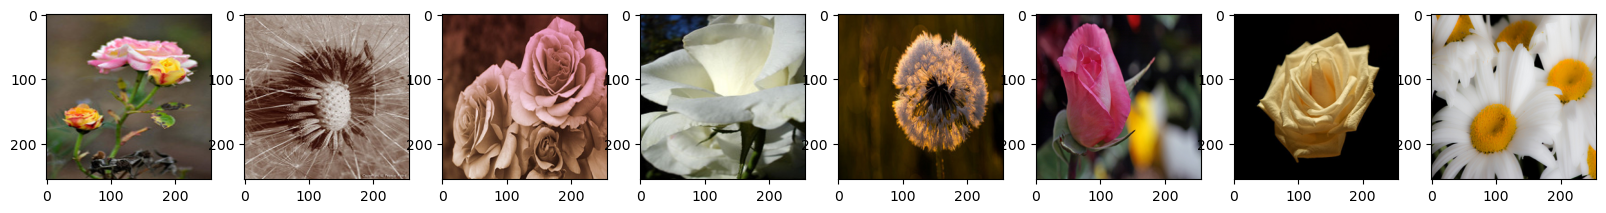

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X_train[i])

## (4) A CNN architecture

First, let's build our own CNN.

❓ **Questions** ❓

1. <u>CNN Architecture and compiler:</u> Create a CNN with our own architecture and a function `load_own_model` that will be able to generate it. Some advice:
    - Incorporate the Rescaling Layer in our Sequential architecture
    - Add three Conv2D/MaxPooling2D combinations with an increasing number of channels and a decreasing size of kernels for example (be creative, that is not a rule of thumb, mastering CNN is an art)
    - Don't forget the Flatten layer and some hidden layers
    - Finish with the predictive layer
    - Compile our CNN model accordingly
  
  
2. <u>Training and comparison</u>:
    - Train our CNN
    - Compare its performance to a baseline accuracy

<details>
    <summary><i>Recommended architecture:</i></summary>

```python
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()

# Notice this cool new layer that "pipe" your rescaling within the architecture
model.add(Rescaling(1./255, input_shape=(256,256,3)))

# Lets add 3 convolution layers, with relatively large kernel size as our pictures are quite big too
model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
```

        
</details>        

In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

def load_own_model():

    model = Sequential()
    model.add(Rescaling(1./255, input_shape=(256,256,3)))

    model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
    model.add(layers.MaxPooling2D(3))

    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model

In [ ]:
model_homemade = load_own_model()
model_homemade.summary()

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

history = model_homemade.fit(X_train, y_train,
                             validation_data = (X_val, y_val),
                             batch_size = 16,
                             epochs = 100,
                             callbacks=[es])

In [ ]:
res = model_homemade.evaluate(X_test, y_test)
res

In [ ]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

🥡 <b><u>Takeaways from building our own CNN</u></b>:
* On an "easy dataset" like the MNIST, it is now easy to reach a decent accuracy. But for a more complicated problem like classifying flowers, it already becomes more challenging. Let's take a few minutes to play with the following link before moving on to Transfer Learning
    * [PoloClub/CNN-Explainer](https://poloclub.github.io/cnn-explainer/)

## (5) Using a pre-trained CNN = Transfer learning

As it's said in the beginning, tech companies and university labs have more computational resources than we do.

🔥 The [**Visual Geometry Group**](https://www.robots.ox.ac.uk/~vgg/data/) *(Oxford University, Department of Science and Engineering)* became famous for some of their **Very Deep Convolutional Neural Networks**: the [**VGG16**](https://www.robots.ox.ac.uk/~vgg/research/very_deep/)

Take 7 minutes of your time to watch this incredible video of Convolutional Layers created by Dimitri Dmitriev.

* 📺 **[VGG16 Neural Network Visualization](https://www.youtube.com/watch?v=RNnKtNrsrmg)**


### (5.1) Load VGG16 model

❓ **Question: loading the VGG16** ❓

* Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Have a look at the documentation 📚  [tf/keras/applications/VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16)📚

* We will **load the VGG16 model** the following way:
    - Let's use the **weights** learned on the [**imagenet dataset**](https://www.image-net.org/download.php) (14M pictures with 20k labels)
    - The **`input_shape`** corresponds to the input shape of our images
        - Note: *We have to resize them down to a consistent shape if they have different height/widths/channels*
    - The **`include_top`** argument should be set to `False`:
        - to avoid loading the weights of the fully-connected layers of the VGG16
        - and also remove the last layer of the VGG16 which was specifically trained on `imagenet`

<i><u>Remark:</u></i> Do not change the default value of the other arguments

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():

    model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)

    return model

❓ **Question: number of parameters in the VGG16** ❓

Let's look at the architecture of the model using ***.summary()***

In [ ]:
model = load_model()
model.summary()

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">

Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D
- The `layers.Flatten` and the `layers.Dense` are not there yet, we need to add them.
- There are more than 14,000,000 parameters, which is a lot...
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers before the flattening will be set non-trainable.

---

❓ **Question: deactivating the training of the VGG16 paramters** ❓

* Write a first function which:
    - takes the previous model as the input
    - sets the first layers to be non-trainable, by applying **`model.trainable = False`**
    - returns the model.

* Then inspect the summary of the model to check that the parameters are no longer trainable, they were set to be **`non-trainable`**.



In [ ]:
def set_nontrainable_layers(model):

    # Set the first layers to be untrainable
    model.trainable = False

    return model

In [ ]:
model = set_nontrainable_layers(model)
model.summary()

❓ **Question: chaining the pretrained convolutional layers of VGG16 with our own dense layers** ❓

We will write a function that adds flattening and dense layers after the convolutional layers. To do so, we cannot directly use the classic `layers.Sequential()` instantiation.

For that reason, we will discover another way here. The idea is that we define each layer (or group of layers) separately. Then, we concatenate them. Let's look at this example:

---
```python
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(SOME_NUMBER_1, activation='relu')
prediction_layer = layers.Dense(SOME_NUMBER_2, activation='APPROPRIATE_ACTIVATION')

model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])

```
---

* The first line loads a group of layers which is the previous VGG-16 model.
* Then, we set these layers to be non-trainable.
* Eventually, we can instantiate as many layers as we want.
* Finally, we use the `Sequential` with the sequence of layers that will correspond to our overall neural network.

Replicate the following steps by adding:
* a flattening layer
* two dense layers (the first with 500 neurons) to the previous VGG-16 model.

In [ ]:
from tensorflow.keras import layers, models

def add_last_layers(model):
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''

    base_model = set_nontrainable_layers(model)
    flatten_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(3, activation='softmax')


    model = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer,
        prediction_layer
    ])

    return model

❓ **Question: inspect the parameters of a customized VGG16** ❓

* Now look at the layers and the parameters of our model.
* Note that there is a distinction, at the end, between the **trainable** and **non-trainable parameters**

In [ ]:
model = add_last_layers(model)
model.summary()

❓ **Question: building a function that creates a full customized VGG16 and compiles it** ❓

* Write a function which builds and compiles our model
    * We choose using the _adam_ optimizer with `learning_rate=1e-4`.

In [ ]:
from tensorflow.keras import optimizers

def build_model():

    model = load_model()
    model = add_last_layers(model)

    opt = optimizers.Adam(learning_rate=1e-4)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model


In [ ]:
model = build_model()
model.summary()

### (5.2) Back to the data

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

❓ **Question: preprocessing the dataset** ❓

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that we can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

### (5.3)  Fit the model



❓ **Question: Training the customized VGG16** ❓

* Train the model with an Early stopping criterion on the validation accuracy
* Since the validation data is provided, we use `validation_data` instead of `validation_split`.

_As usual, we store the results of your training into a `history` variable._

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = build_model()

es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=16,
                    callbacks=[es])

❓ **Question: Looking at the accuracy** ❓

Plot the accuracy for both the train set and and the validation set using the **plot_history** function below

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

In [ ]:
plot_history(history)

❓ **Question: Evaluating the model** ❓

Evaluate the customized VGG16 accuracy on the test set. Did we improve?

In [ ]:
res_vgg = model.evaluate(X_test, y_test)

test_accuracy_vgg = res_vgg[-1]


print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')


## (6) (Optional) Improve the model

Now, we can try to improve the model's test accuracy. To do that, here are some options we can consider

1. **Unfreeze and finetune**: Source: [Google tutorial](https://www.tensorflow.org/guide/keras/transfer_learning#fine-tuning)
>_Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate. This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind. It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features. It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way._


1. Add **Data Augmentation** if the model is overfitting.

2. If our model is not overfitting, try a more complex model.

3. Perform a precise **Grid Search** on all the hyper-parameters: learning_rate, batch_size, data augmentation etc...

4. **Change the base model** to more modern CNN (ResNet, EfficientNet1,... available in the keras library)

5. Curate the data: maintaining a sane data set is one of the keys to success.

6. Collect more data

## (6.1) Data augmentation


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    brightness_range = (0.5, 1.),
    zoom_range = (0.3, 1.5))


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

model_data_aug = build_model()

train_flow = datagen.flow(X_train, y_train, batch_size=16)
val_flow = datagen.flow(X_val, y_val, batch_size=16)

es = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

history_data_aug = model_data_aug.fit(train_flow,
                                      validation_data = val_flow,
                                      epochs = 50,
                                      callbacks = [es])

In [ ]:
plt.plot(history_data_aug.history['accuracy'])
plt.plot(history_data_aug.history['val_accuracy'])
plt.show()

In [ ]:
res_aug = model_data_aug.evaluate(X_test, y_test)

## (6.2) Comparing the performances of the CNN, the VGG, and the VGG trained on the augmented dataset

In [ ]:
test_accuracy_aug = res_aug[-1]


print(f"test_accuracy_aug = {round(test_accuracy_aug,2)*100} %")

print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')
